In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import datetime

In [2]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams

You should consider upgrading via the 'C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
data = pd.read_csv("C:/Users/Om SaiRam/Desktop/Project3/dataset/^NSEBANK.csv", parse_dates= ['Date'])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.100098,0.0
1,2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.649902,0.0
2,2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.850098,0.0
3,2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.149902,0.0
4,2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.500000,0.0
...,...,...,...,...,...,...,...
3780,2023-01-05,43073.050781,43137.550781,42298.601563,42608.699219,42608.699219,189100.0
3781,2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100.0
3782,2023-01-09,42404.851563,42716.800781,42186.550781,42582.750000,42582.750000,161800.0
3783,2023-01-10,42642.000000,42674.250000,41835.750000,42014.750000,42014.750000,179300.0


# Creating column month because we want to predict our nifty on basis of month

In [4]:
from datetime import datetime
my_datetime = datetime.now()
print(my_datetime)

2023-02-16 14:02:48.542509


In [5]:
my_string1 = my_datetime.isoformat(' ', 'seconds')
print(my_string1)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date')
print(data)

2023-02-16 14:02:48
           Date          Open          High           Low         Close  \
0    2007-09-17   6898.000000   6977.200195   6843.000000   6897.100098   
1    2007-09-18   6921.149902   7078.950195   6883.600098   7059.649902   
2    2007-09-19   7111.000000   7419.350098   7111.000000   7401.850098   
3    2007-09-20   7404.950195   7462.899902   7343.600098   7390.149902   
4    2007-09-21   7378.299805   7506.350098   7367.149902   7464.500000   
...         ...           ...           ...           ...           ...   
3780 2023-01-05  43073.050781  43137.550781  42298.601563  42608.699219   
3781 2023-01-06  42649.699219  42685.898438  41877.000000  42188.800781   
3782 2023-01-09  42404.851563  42716.800781  42186.550781  42582.750000   
3783 2023-01-10  42642.000000  42674.250000  41835.750000  42014.750000   
3784 2023-01-11  42071.851563  42318.000000  41729.000000  42232.699219   

         Adj Close    Volume  
0      6897.100098       0.0  
1      7059.64990

In [6]:
#data['Year'] = pd.DatetimeIndex(data['Date']).year
#data['Month'] = pd.DatetimeIndex(data['Date']).mon
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.year
data.index = pd.DatetimeIndex(data.index).to_period('M')
print("Modified DataFrame:\n",data)

Modified DataFrame:
               Date          Open          High           Low         Close  \
1970-01 2007-09-17   6898.000000   6977.200195   6843.000000   6897.100098   
1970-01 2007-09-18   6921.149902   7078.950195   6883.600098   7059.649902   
1970-01 2007-09-19   7111.000000   7419.350098   7111.000000   7401.850098   
1970-01 2007-09-20   7404.950195   7462.899902   7343.600098   7390.149902   
1970-01 2007-09-21   7378.299805   7506.350098   7367.149902   7464.500000   
...            ...           ...           ...           ...           ...   
1970-01 2023-01-05  43073.050781  43137.550781  42298.601563  42608.699219   
1970-01 2023-01-06  42649.699219  42685.898438  41877.000000  42188.800781   
1970-01 2023-01-09  42404.851563  42716.800781  42186.550781  42582.750000   
1970-01 2023-01-10  42642.000000  42674.250000  41835.750000  42014.750000   
1970-01 2023-01-11  42071.851563  42318.000000  41729.000000  42232.699219   

            Adj Close    Volume  Month  Ye

In [7]:
data.sort_values(by='Date')

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
1970-01,2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.100098,0.0,9,2007
1970-01,2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.649902,0.0,9,2007
1970-01,2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.850098,0.0,9,2007
1970-01,2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.149902,0.0,9,2007
1970-01,2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.500000,0.0,9,2007
...,...,...,...,...,...,...,...,...,...
1970-01,2023-01-05,43073.050781,43137.550781,42298.601563,42608.699219,42608.699219,189100.0,1,2023
1970-01,2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100.0,1,2023
1970-01,2023-01-09,42404.851563,42716.800781,42186.550781,42582.750000,42582.750000,161800.0,1,2023
1970-01,2023-01-10,42642.000000,42674.250000,41835.750000,42014.750000,42014.750000,179300.0,1,2023


In [8]:
#now we dont need year column so we are droping it
del data['Year']
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
1970-01,2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.100098,0.0,9
1970-01,2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.649902,0.0,9
1970-01,2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.850098,0.0,9
1970-01,2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.149902,0.0,9
1970-01,2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.500000,0.0,9


In [9]:
#making Date column as index
pd.to_datetime(data['Date'])
data.set_index('Date', inplace= True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.100098,0.0,9
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.649902,0.0,9
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.850098,0.0,9
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.149902,0.0,9
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.500000,0.0,9


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Month
count,3484.000000,3484.000000,3484.000000,3484.000000,3484.000000,3.484000e+03,3785.000000
mean,18828.939895,18987.812835,18644.068152,18817.618794,18817.618794,6.586843e+05,6.577015
std,10440.157279,10496.856943,10369.683396,10435.542285,10435.542285,3.076064e+07,3.470039
min,3385.399902,3446.750000,3314.550049,3339.699951,3339.699951,0.000000e+00,1.000000
25%,10066.237793,10166.825195,9948.074707,10073.037109,10073.037109,0.000000e+00,4.000000
50%,16312.149902,16434.674805,16161.949707,16302.550293,16302.550293,0.000000e+00,7.000000
75%,26940.625000,27057.050293,26738.099609,26884.312989,26884.312989,1.980000e+04,10.000000
max,44078.601563,44151.800781,43987.949219,44049.101563,44049.101563,1.798102e+09,12.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3785 entries, 2007-09-17 to 2023-01-11
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3484 non-null   float64
 1   High       3484 non-null   float64
 2   Low        3484 non-null   float64
 3   Close      3484 non-null   float64
 4   Adj Close  3484 non-null   float64
 5   Volume     3484 non-null   float64
 6   Month      3785 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 236.6 KB


In [12]:
data.shape

(3785, 7)

In [13]:
#rename column
data.rename(columns = {'Adj Close' : 'Adj_Close'}, inplace = True)
data.head()

,Open,High,Low,Close,Adj_Close,Volume,Month
Date,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.100098,0.0,9
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.649902,0.0,9
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.850098,0.0,9
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.149902,0.0,9
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.500000,0.0,9


In [14]:
#check null
data.isnull().sum()

Open         301
High         301
Low          301
Close        301
Adj_Close    301
Volume       301
Month          0
dtype: int64

In [15]:
#fill null
data['Open'].fillna(data['Open'].mean(), inplace = True)
data['High'].fillna(data['High'].mean(), inplace = True)
data['Low'].fillna(data['Low'].mean(), inplace = True)
data['Close'].fillna(data['Close'].mean(), inplace = True)
data['Adj_Close'].fillna(data['Adj_Close'].mean(), inplace = True)
data['Volume'].fillna(data['Volume'].mean(), inplace = True)

In [16]:
#Check
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
Month        0
dtype: int64

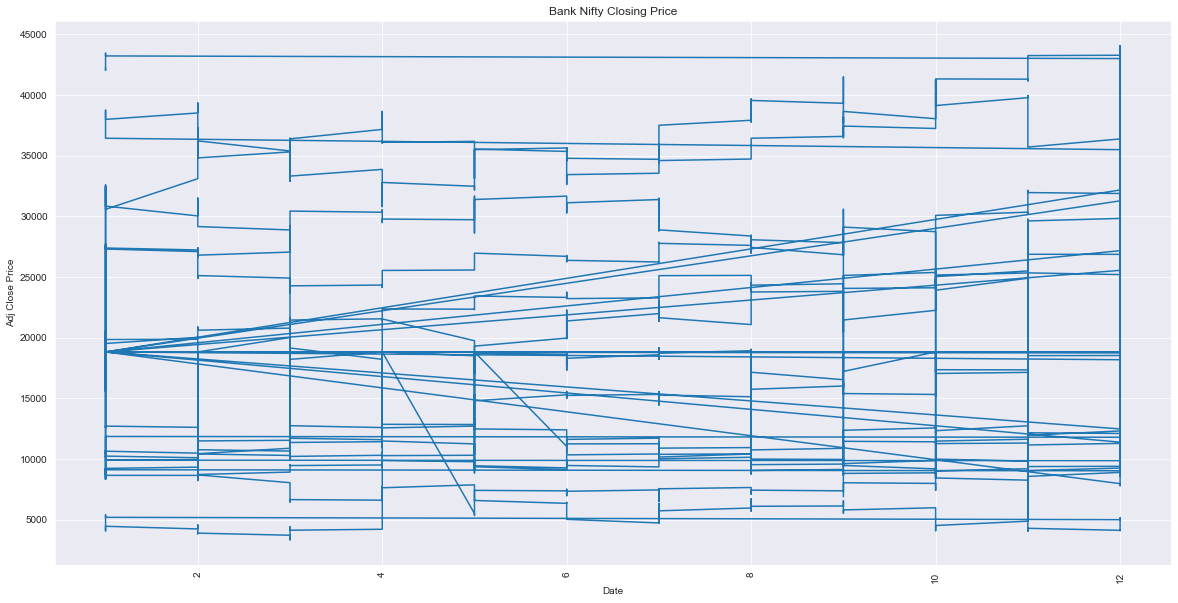

In [17]:
#visualize data
df = data.sort_values('Date', ascending=True)
plt.figure(figsize= (20,10)) 
sns.set_style("darkgrid")
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Bank Nifty Closing Price')
plt.plot(df['Month'], df['Adj_Close'])
plt.xticks(rotation='vertical')
plt.show()

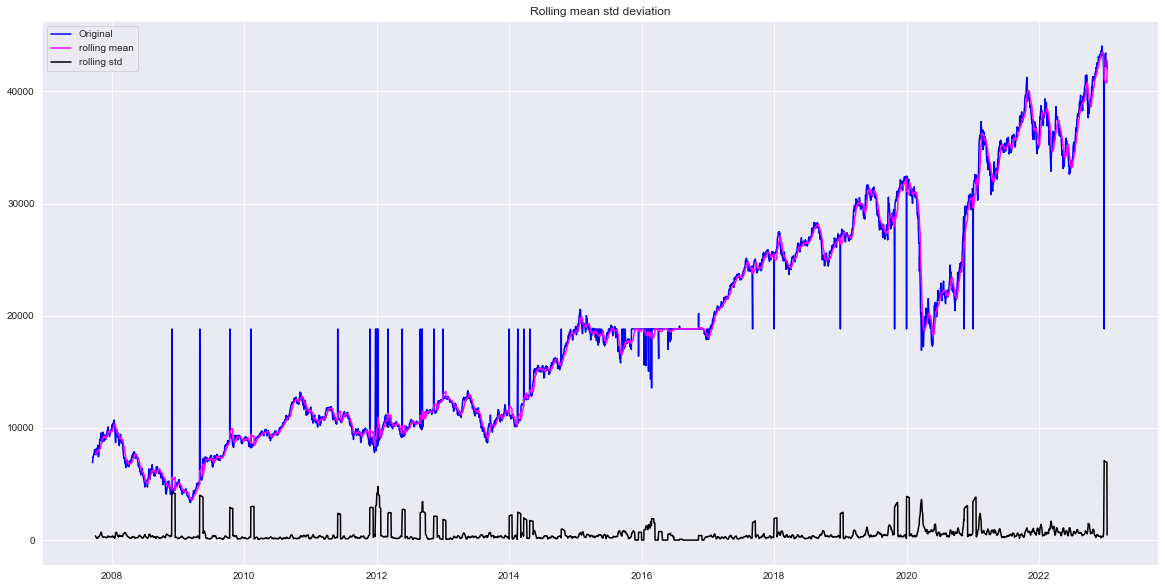

Result of dickey fuller test
Test Statistics                0.065417
p - value                      0.963619
no. of lags used               9.000000
no. of observations used    3775.000000
Critical Value (1%)           -3.432083
Critical Value (5%)           -2.862306
Critical Value (10%)          -2.567178
dtype: float64


In [18]:

# Check whether the data is stationary or not
# ADF Test
#df = (data.Adj_Close,data.Date) 
def ADF_Test(timeseries):
    moving_average = timeseries.rolling(12).mean()
    moving_std = timeseries.rolling(12).std()
    plt.figure(figsize= (20,10))
    plt.plot(timeseries, color = 'blue', label = 'Original')
    plt.plot(moving_average, color = 'magenta', label = 'rolling mean')
    plt.plot(moving_std, color = 'black', label = 'rolling std')
    plt.legend(loc = 'best')
    plt.title('Rolling mean std deviation')
    plt.show()
    print("Result of dickey fuller test")
    adft = adfuller(timeseries, autolag = 'AIC')
    output = pd.Series(adft[0:4], index = ['Test Statistics', 'p - value', 'no. of lags used', 'no. of observations used'])
    for key,value in adft[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)
       
ADF_Test(data.Adj_Close)


In [19]:
# series = data.loc[:, 'Adj_Close'].values
# result = adfuller(series, autolag='AIC')
# print(f'ADF Statistic: {result[0]}')
# print(f'n_lags: {result[1]}')
# print(f'p-value: {result[1]}')
# for key, value in result[4].items():
#     print('Critial Values:')
#     print(f'   {key}, {value}') 

In [20]:
# the time series data is non stationary so we need to convert it in stationary data

<Figure size 432x288 with 0 Axes>

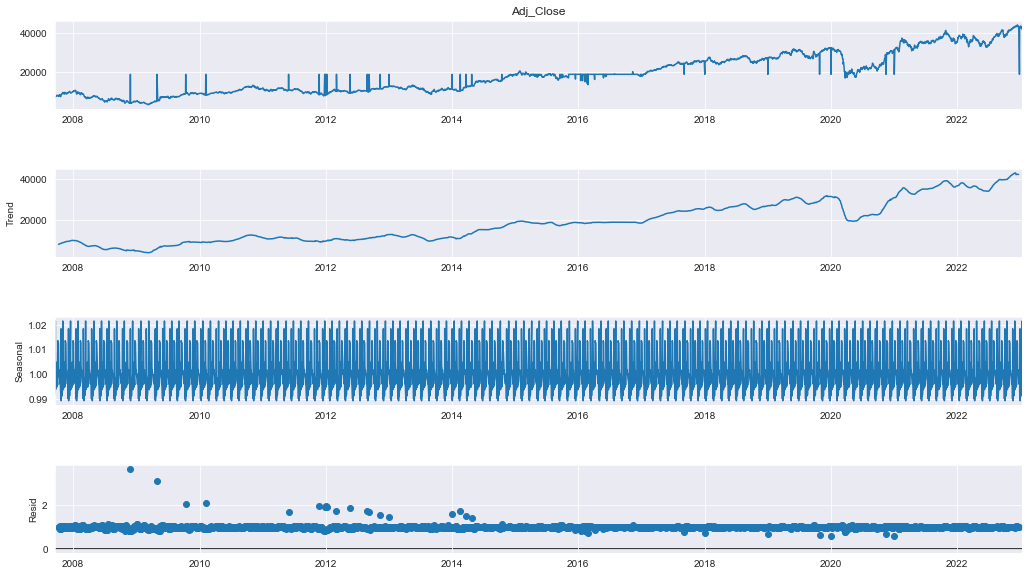

In [21]:
#from time series separating trend and seasonality

from statsmodels.tsa.seasonal import seasonal_decompose
df = (data.Adj_Close)
result = seasonal_decompose(data.Adj_Close, model = 'multiplicative',period=30)
#combine_seasonal_cols(data.Adj_Close, result)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


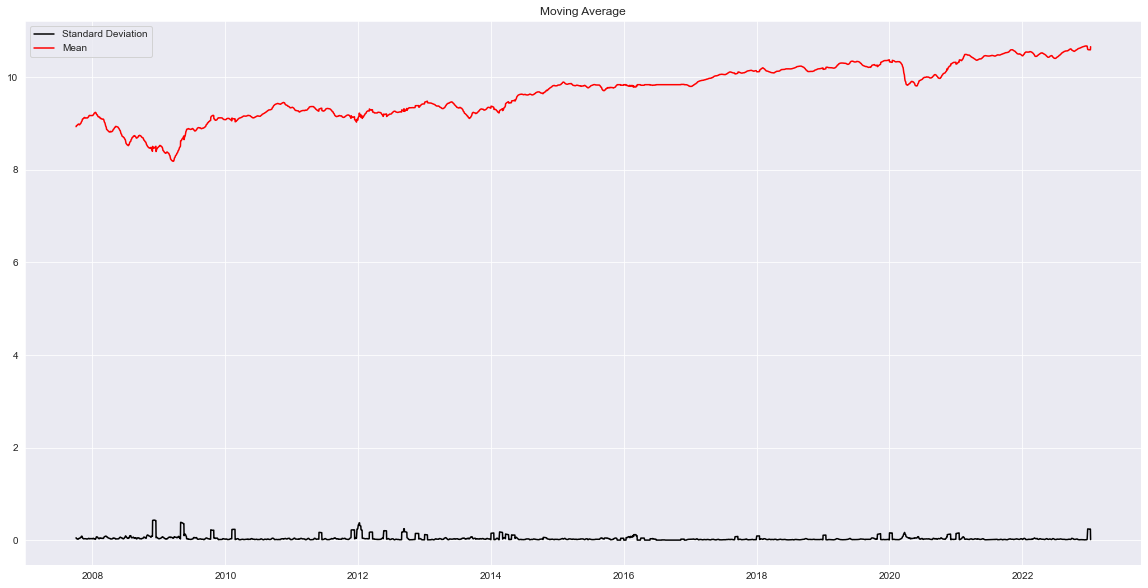

In [22]:
#Converting Non-stationary to stationary
rcParams['figure.figsize'] = 20,10
data_adj_close_log = np.log(data.Adj_Close)
moving_average = data_adj_close_log.rolling(12).mean()
std_dev = data_adj_close_log.rolling(12).std()
plt.legend(loc = 'best')
plt.title('Moving Average')
plt.plot(std_dev, color= 'black',label= 'Standard Deviation')
plt.plot(moving_average, color= 'red',label= 'Mean')
plt.legend()
plt.show()

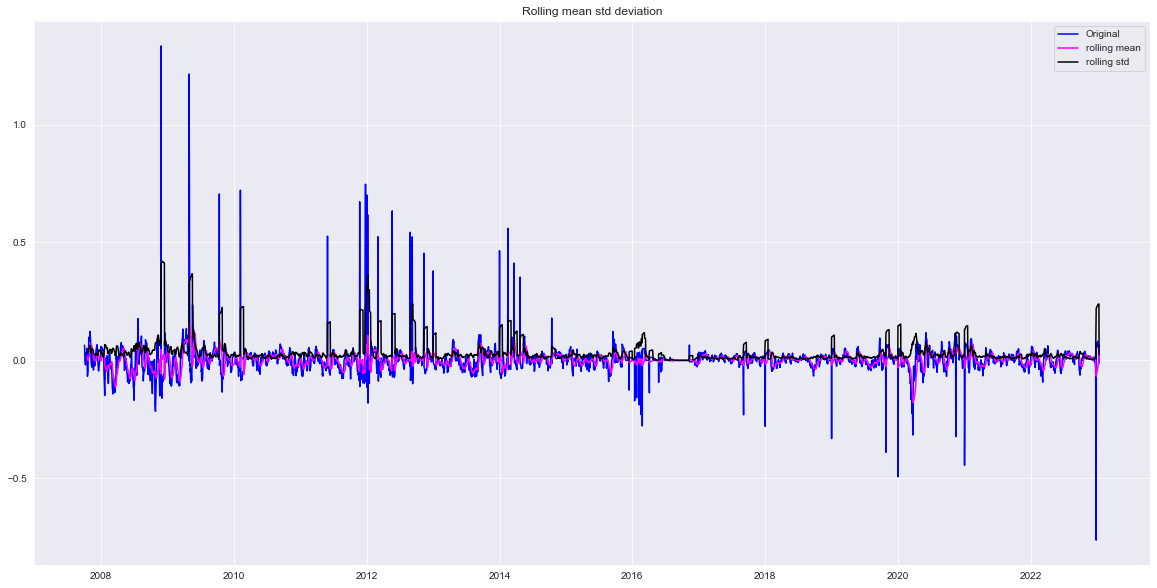

Result of dickey fuller test
Test Statistics            -1.480783e+01
p - value                   2.052163e-27
no. of lags used            1.200000e+01
no. of observations used    3.761000e+03
Critical Value (1%)        -3.432090e+00
Critical Value (5%)        -2.862309e+00
Critical Value (10%)       -2.567179e+00
dtype: float64


In [23]:
data_log_minus_mean = data_adj_close_log - moving_average  #one technique to make time series stationary
data_log_minus_mean.dropna(inplace = True) 
ADF_Test(data_log_minus_mean)

In [24]:
data.nunique()

Open         3472
High         3472
Low          3477
Close        3472
Adj_Close    3472
Volume        756
Month          12
dtype: int64

In [25]:
# Label encoding to convert string data into float
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [26]:
data['Adj_Close']

Date
2007-09-17     6897.100098
2007-09-18     7059.649902
2007-09-19     7401.850098
2007-09-20     7390.149902
2007-09-21     7464.500000
                  ...     
2023-01-05    42608.699219
2023-01-06    42188.800781
2023-01-09    42582.750000
2023-01-10    42014.750000
2023-01-11    42232.699219
Name: Adj_Close, Length: 3785, dtype: float64

In [27]:
# use on suburb column
# fit
le.fit(data['Adj_Close'])

LabelEncoder()

In [28]:
# fit transform
data['Adj_Close'] = le.fit_transform(data['Adj_Close'])

In [29]:
#check_data
data['Adj_Close']

Date
2007-09-17     252
2007-09-18     268
2007-09-19     331
2007-09-20     326
2007-09-21     343
              ... 
2023-01-05    3443
2023-01-06    3433
2023-01-09    3442
2023-01-10    3430
2023-01-11    3434
Name: Adj_Close, Length: 3785, dtype: int64

            Adj_Close
Date                 
2007-09-17   8.838856
2007-09-18   8.862151
2007-09-19   8.909485
2007-09-20   8.907903
2007-09-21   8.917914
...               ...
2019-03-08  10.231416
2019-03-11  10.238768
2019-03-12  10.255682
2019-03-13  10.271054
2019-03-14  10.272396

[2838 rows x 1 columns]


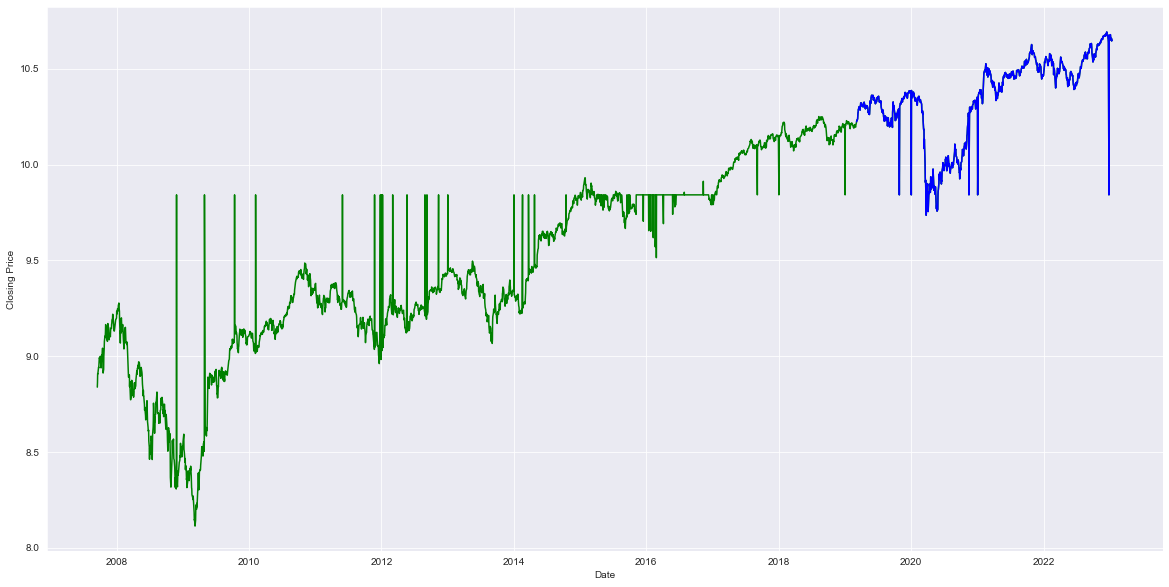

In [30]:
#Train-test spliting
train_data, test_data = data_adj_close_log[:int(len(data_adj_close_log)*0.75)], data_adj_close_log[int(len(data_log_minus_mean)*0.75):]
#dff = np.array(train_data)
df = pd.DataFrame(train_data, columns = ['Adj_Close'])
print(df)
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(data_adj_close_log, 'green', label= 'Train data')
plt.plot(test_data, 'blue')

In [31]:
train_data.head()

Date
2007-09-17    8.838856
2007-09-18    8.862151
2007-09-19    8.909485
2007-09-20    8.907903
2007-09-21    8.917914
Name: Adj_Close, dtype: float64

In [32]:
test_data.head()

Date
2019-03-05    10.223905
2019-03-06    10.226500
2019-03-07    10.231517
2019-03-08    10.231416
2019-03-11    10.238768
Name: Adj_Close, dtype: float64

In [33]:
! pip install pyramid

You should consider upgrading via the 'C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [34]:
! pip install pmdarima

You should consider upgrading via the 'C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
import pmdarima

In [36]:
from pmdarima import auto_arima

In [37]:
stepwise_model = auto_arima(train_data, start_p=0, start_q=0,
                           max_p=7, max_q=7,
                           m=1,
                           d= None,
                           seasonal=False,
                           start_P=0, 
                           D=0,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5458.893, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6171.946, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6759.155, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5460.808, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6757.592, Time=0.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6757.604, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6756.619, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6758.852, Time=0.27 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 4.136 seconds
-6759.1547616145535


In [38]:

#ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

In [39]:
import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(train_data, order=(0,1,1))

model = model.fit()
print(model.summary())

C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj_Close   No. Observations:                 2838
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3381.426
Date:                Thu, 16 Feb 2023   AIC                          -6758.852
Time:                        14:03:00   BIC                          -6746.951
Sample:                             0   HQIC                         -6754.559
                               - 2838                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7722      0.006   -125.557      0.000      -0.784      -0.760
sigma2         0.0054   1.82e-05    296.565      0.000       0.005       0.005
Ljung-Box (L1) (Q):                   0.21   Jarque-

In [40]:
#Model Prediction
test_data.shape

(955,)

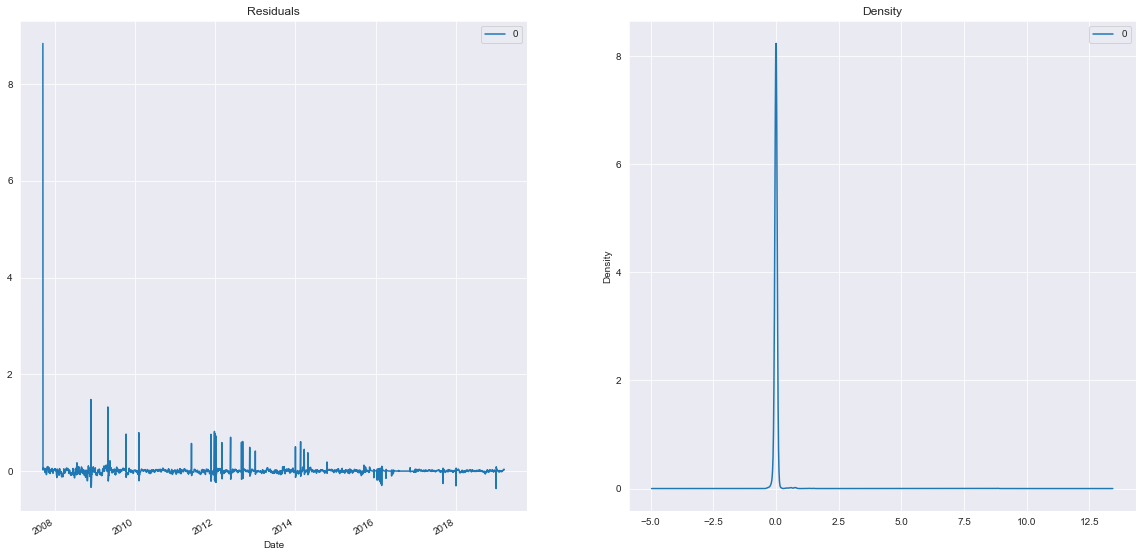

In [41]:
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [42]:
model = ARIMA(train_data, order = (0, 1, 1))
fitted = model.fit()

C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:
fc = fitted.forecast(955, alpha = 0.05)
fc.head()

C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2838    10.247453
2839    10.247453
2840    10.247453
2841    10.247453
2842    10.247453
Name: predicted_mean, dtype: float64

In [44]:
fc_df = pd.DataFrame(fc)
fc_df

,predicted_mean
2838,10.247453
2839,10.247453
2840,10.247453
2841,10.247453
2842,10.247453
...,...
3788,10.247453
3789,10.247453
3790,10.247453
3791,10.247453


In [45]:
fc_df['Date'] =  test_data.index

In [46]:
fc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 2838 to 3792
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   predicted_mean  955 non-null    float64       
 1   Date            955 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.1 KB


In [47]:
fc_df1 = fc_df.copy()
fc_df1.set_index('Date', inplace=True)
fc_df1

,predicted_mean
Date,
2019-03-05,10.247453
2019-03-06,10.247453
2019-03-07,10.247453
2019-03-08,10.247453
2019-03-11,10.247453
...,...
2023-01-05,10.247453
2023-01-06,10.247453
2023-01-09,10.247453


In [48]:
print(type(fc_df1))

<class 'pandas.core.frame.DataFrame'>


C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No suppor

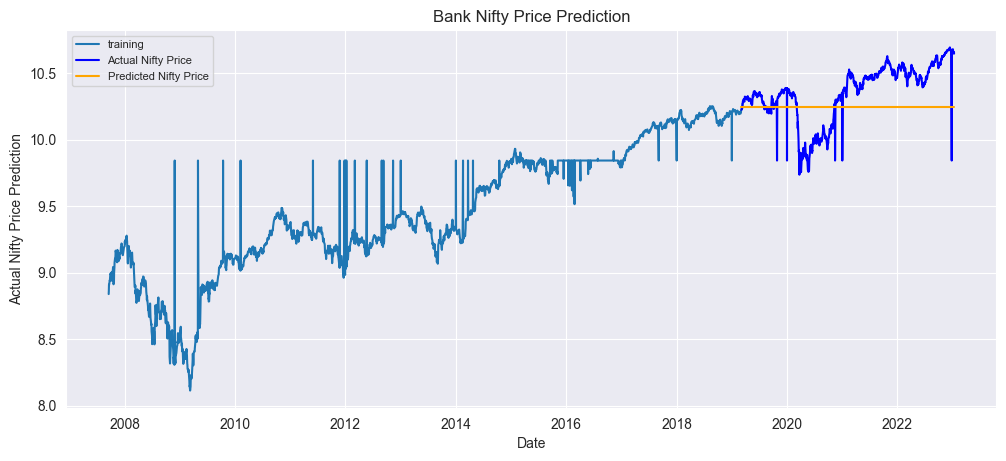

In [49]:
model = ARIMA(train_data, order = (0, 1, 1))
fitted = model.fit()

#Forecast
fc = fitted.forecast(955, alpha = 0.05)
fc_df = pd.DataFrame(fc)
fc_df['Date'] =  test_data.index
fc_df1 = fc_df.copy()
fc_df1.set_index('Date', inplace=True)
#se = fitted.forecast(955, alpha = 0.05)
#conf  = fitted.forecast(955, alpha = 0.05)

# make as pandas series
fc_series = fc_df1
#lower_series = pd.Series(conf[:, 0], index = test_data.index)
#upper_series = pd.Series(conf[:, 1], index = test_data.index)

#Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data, label= 'training')
plt.plot(test_data, color = 'blue', label= 'Actual Nifty Price')
plt.plot(fc_series, color = 'orange', label= 'Predicted Nifty Price')

#plt.fill_between(lower_series.index, lower_series, upper_series, color= 'k', alpha = .05)
plt.title('Bank Nifty Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Nifty Price Prediction')
plt.legend(loc = 'upper left', fontsize= 8)
plt.show()

In [50]:
data.index = pd.DatetimeIndex(data.index).to_period('M')

In [51]:
#create a differenced series
vector = np.vectorize(np.float64)
def difference(data, interval=1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        vector(value)
        diff.append(value)
        return np.array(diff)

In [52]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [53]:
# seasonal difference
X = data['Adj_Close'].values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(0,1,1))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 2847.000000


C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


In [54]:
differenced

array([-245], dtype=int64)

In [55]:
model = ARIMA(differenced, order=(0,1,1))
model_fit = model.fit()

In [78]:
# Predicting week value

forecast = model_fit.forecast(steps=7)
# invert the differenced forecast to something usable
df = pd.DataFrame(data['Month'])
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1     

Day 1: 2847.000000
Day 2: 2826.000000
Day 3: 2841.000000
Day 4: 2830.000000
Day 5: 2843.000000
Day 6: 2889.000000
Day 7: 2960.000000


In [62]:
forecast = model_fit.forecast(steps=12)

In [64]:
#create a differenced series
vector = np.vectorize(np.float64)
def difference(data, interval=1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        vector(value)
        diff.append(value)
        return np.array(diff)
    
 # invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]    


# seasonal difference
X = data['Adj_Close'].values
months_in_year = 12
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(0,1,1))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, months_in_year)
print('Forecast: %f' % forecast)

Forecast: 3202.000000


C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


In [79]:
forecast = model_fit.forecast(steps=12)
# invert the differenced forecast to something usable
df = pd.DataFrame(data['Month'])
history = [x for x in X]
Month = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print(('Month %d:' %Month, inverted))
    history.append(inverted)
    Month += 1 

('Month 1:', 2847.0)
('Month 2:', 2826.0)
('Month 3:', 2841.0)
('Month 4:', 2830.0)
('Month 5:', 2843.0)
('Month 6:', 2889.0)
('Month 7:', 2960.0)
('Month 8:', 2947.0)
('Month 9:', 2945.0)
('Month 10:', 2962.0)
('Month 11:', 2963.0)
('Month 12:', 2944.0)


In [80]:
#performance of model
import math
from sklearn.metrics import  mean_absolute_error, mean_squared_error
mse = mean_squared_error(test_data, fc)
print('MSE:'+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE:'+str(mae))
mape = np.mean(np.abs(fc-test_data)/np.abs(test_data))
print('MAPE:'+str(mape))

MSE:0.05652295346134688
MAE:0.20686917674325972
MAPE:nan


C:\Users\Om SaiRam\AppData\Local\Temp\ipykernel_23780\2376977867.py:8: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs(fc-test_data)/np.abs(test_data))
